# Home work 2
HDS - Napong Leelasithorn - 61070505228

tasks <br>
- Use the UN General Debates dataset
- Explore the pattern
- Identify the cleaning points
- Conduct text cleaning
- Explore the word and character distribution

In [139]:
import pandas as pd
import regex as re
import nltk
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [3]:
undeb = pd.read_csv('un-general-debates-blueprint.csv.gz')
undeb.head()

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."


## 1. Explore the pattern & Identify the cleaning points

In [4]:
df = undeb.sample(n = 5, random_state = 42)
df

,session,year,country,country_name,speaker,position,text
4456,54,1999,ZAF,South Africa,Thabo Mbeki,President,On behalf of our Government and\nin my capacit...
5603,61,2006,BRA,Brazil,Mr. Lula Da Silva,President,When I first \naddressed the Assembly from thi...
4685,56,2001,DZA,Algeria,Abdelaziz Belkhadem,Minister for Foreign Affairs,﻿This\nsession is taking place at a time when ...
1055,33,1978,NIC,Nicaragua,Quintana,NaN,﻿\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n388.\tIt ...
4812,56,2001,UKR,Ukraine,Anatoliy M. Zlenko,Minister for Foreign Affairs,﻿Allow me at the outset to\ncongratulate the P...


In [5]:
re.findall(r'\[.+]', undeb['text'][3])

['[A 17922]', '[242 (1967)]', '[resolution 2373 (XXII)]']

### Check if any word characters before/after [\n, \t]. +references.

In [6]:
def cleaning(txt, df = None, column = None, do = 'sub'):
    checkn,checkt,checkref = [],[],[]
    if do == 'check':
        for text in df[column]:
            checkn += re.findall(r'[\w]*\n+[\w]*', text)
            checkt += re.findall(r'[\w]*\t+[\w]*', text)
            checkref += re.findall(r'\[.+]', text)
        print('\(n): {} \n\n\n\(t): {} \n\n\nrefs: {}'.format(checkn[:20], checkt[:20], checkref[:20])) #max = 20 samples 
    elif do == 'sub':
        return re.sub(r'(\n|\t|\[.+])', ' ',txt)

In [7]:
cleaning(None, df, column = 'text', do = 'check')

\(n): ['and\nin', 'I\nwish', '\nMr', 'the\nGeneral', 'the\nkind', 'assumed\nyour', '\nWe', 'Thanks\nin', 'we\nlive', 'to\nensure', 'These\nexperiences', 'your\nresponsibilities', 'a\nmanner', 'a\nbetter', 'be\nworking', 'has\ndemonstrated', 'realization\nof', '\nThe', 'Universal\nDeclaration', 'the\nvision'] 


\(t): ['\tIt', '\tI', '\tI', '\tA', '\tWe', '\tIn', '\tOn', '\tWe', '\tA', '\tOf', '\tIn', '\tMeanwhile', '\tAs', '\tSimilarly', '\tI', 'been\tagreed', '\tIn', '\tIn', '\tThe', '\tDespite'] 


refs: ['[resolution S-10/2]']


We must replace \n and \t with 1 or more whitespaces due to the presence of \t and \n between the alphabets. Also, I decided to do nothing with any number since we have no numeric included in our tokenize function.

In [8]:
df['text1'] = df['text'].apply(cleaning)
df

,session,year,country,country_name,speaker,position,text,text1
4456,54,1999,ZAF,South Africa,Thabo Mbeki,President,On behalf of our Government and\nin my capacit...,On behalf of our Government and in my capacity...
5603,61,2006,BRA,Brazil,Mr. Lula Da Silva,President,When I first \naddressed the Assembly from thi...,When I first addressed the Assembly from this...
4685,56,2001,DZA,Algeria,Abdelaziz Belkhadem,Minister for Foreign Affairs,﻿This\nsession is taking place at a time when ...,﻿This session is taking place at a time when t...
1055,33,1978,NIC,Nicaragua,Quintana,NaN,﻿\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n388.\tIt ...,﻿ 388. It is my pleasure to c...
4812,56,2001,UKR,Ukraine,Anatoliy M. Zlenko,Minister for Foreign Affairs,﻿Allow me at the outset to\ncongratulate the P...,﻿Allow me at the outset to congratulate the Pr...


In [9]:
df['text1'][1055][:500]

'\ufeff                  388. It is my pleasure to convey on behalf of my Government, and on my own behalf, warmest congratulations to Mr. Lievano of Colombia on his well deserved election to the honourable post of President of this General Assembly. His election is a universal recognition of his high qualities as a statesman and a diplomat and a tribute to the noble nation which he so worthily represents, as well as an honour for the whole of Latin America. 389. I wish also to congratulate his predec'

As you can see, it still have \ufeff which I don't know what it is, but it probably not significance.

Applying to the whole data.

In [10]:
undeb['text1'] = undeb['text'].apply(cleaning)
undeb

,session,year,country,country_name,speaker,position,text,text1
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...,177. : It is a fortunate coincidence that pre...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...,100. It is a pleasure for me to extend to yo...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...,155. May I begin by expressing to Ambassador...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ...","176. No doubt each of us, before coming up to ..."
...,...,...,...,...,...,...,...,...
7502,70,2015,YEM,Yemen,Mr. Abdrabuh Mansour Hadi Mansour,President,On behalf of the people and the Government of ...,On behalf of the people and the Government of ...
7503,70,2015,YUG,Yugoslavia,Mr. Tomislav Nikolić,President,\nSeventy years have passed since the establis...,Seventy years have passed since the establish...
7504,70,2015,ZAF,South Africa,Jacob Zuma,President,I should like to congratulate the President an...,I should like to congratulate the President an...
7505,70,2015,ZMB,Zambia,Mr. Edgar Chagwa Lungu,President,I would like to begin by thanking the Secretar...,I would like to begin by thanking the Secretar...


### Find the most mentioned year

In [11]:
# find only 18xx, 19xx and 20xx
re.findall(r'(1[89]\d{2}|20\d{2})', 'born 1220 to 1900 haha this is2021 missing 1989')

['1900', '2021', '1989']

In [12]:
year_count = Counter()

for txt in undeb['text1']:
    try:
        tmp = re.findall(r'(1[89]\d{2}|20\d{2})', txt)
        year_count.update(tmp)
    except:
        pass

In [14]:
freq_year = pd.DataFrame.from_dict(year_count, orient='index', columns=['freq'])
freq_year.sort_values(by = 'freq', ascending = False)[:10]

,freq
2015,2732
1967,2394
1978,1856
1990,1586
1980,1495
1973,1239
1992,1131
2000,1120
2001,1082
2005,962


2015 was the most discussed year. Presumably, the Millennium Development Goals, and 1967 is the year that prohibit nuclear weapons from outer space and also, still in the Vietnam War.

## 2. Conduct text cleaning

### Pipeline
- to lowercase
- tokenizing
- lemmantizing
- removing stop words

In [15]:
def tokenize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)

In [16]:
stopwords = set(nltk.corpus.stopwords.words('english'))

def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

In [17]:
nltk.download('wordnet')
wnl = nltk.WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Save\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
def lemmantizer(tokens):
    return [wnl.lemmatize(t) for t in tokens]

In [23]:
porter = nltk.PorterStemmer()

In [25]:
def stemmer(tokens):
    return [porter.stem(t) for t in tokens]

In [87]:
pipeline = [str.lower, tokenize, remove_stop] 

def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

### Applying pipeline

In [88]:
undeb['tokens'] = undeb['text1'].apply(prepare, pipeline = pipeline)
undeb.head()

,session,year,country,country_name,speaker,position,text,text1,tokens,lem,stem
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...,33: May I first convey to our President the co...,"[may, first, convey, president, congratulation...","[may, first, convey, president, congratulation...","[may, first, convey, presid, congratul, albani..."
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...,177. : It is a fortunate coincidence that pre...,"[fortunate, coincidence, precisely, time, unit...","[fortunate, coincidence, precisely, time, unit...","[fortun, coincid, precis, time, unit, nation, ..."
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...,100. It is a pleasure for me to extend to yo...,"[pleasure, extend, mr, president, warmest, con...","[pleasure, extend, mr, president, warmest, con...","[pleasur, extend, mr, presid, warmest, congrat..."
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...,155. May I begin by expressing to Ambassador...,"[may, begin, expressing, ambassador, hambro, b...","[may, begin, expressing, ambassador, hambro, b...","[may, begin, express, ambassador, hambro, beha..."
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ...","176. No doubt each of us, before coming up to ...","[doubt, us, coming, rostrum, wonders, usefulne...","[doubt, u, coming, rostrum, wonder, usefulness...","[doubt, us, befor, come, thi, rostrum, wonder,..."


In [89]:
%%time
undeb['lem'] = undeb['tokens'].apply(lemmantizer)

Wall time: 37.8 s


In [90]:
%%time
undeb['stem'] = undeb['tokens'].apply(stemmer)

Wall time: 3min 29s


In [91]:
undeb[['session', 'country', 'lem', 'stem']]

,session,country,lem,stem
0,25,ALB,"[may, first, convey, president, congratulation...","[may, first, convey, presid, congratul, albani..."
1,25,ARG,"[fortunate, coincidence, precisely, time, unit...","[fortun, coincid, precis, time, unit, nation, ..."
2,25,AUS,"[pleasure, extend, mr, president, warmest, con...","[pleasur, extend, mr, presid, warmest, congrat..."
3,25,AUT,"[may, begin, expressing, ambassador, hambro, b...","[may, begin, express, ambassador, hambro, beha..."
4,25,BEL,"[doubt, u, coming, rostrum, wonder, usefulness...","[doubt, us, come, rostrum, wonder, use, futil,..."
...,...,...,...,...
7502,70,YEM,"[behalf, people, government, yemen, would, lik...","[behalf, peopl, govern, yemen, would, like, co..."
7503,70,YUG,"[seventy, year, passed, since, establishment, ...","[seventi, year, pass, sinc, establish, unit, n..."
7504,70,ZAF,"[like, congratulate, president, country, denma...","[like, congratul, presid, countri, denmark, el..."
7505,70,ZMB,"[would, like, begin, thanking, secretary-gener...","[would, like, begin, thank, secretary-gener, e..."


## 3. Explore the word and character distribution 

### count words and word cloud functions

In [92]:
def count_words(df, column='tokens', preprocess=None, min_freq = 2):
    
    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)
    
    # create counter and run through all data
    counter = Counter()
    df[column].map(update)
    
    # transform counter into a DataFrame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq > @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

In [93]:
def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")

### Count words

In [94]:
# using lemmantization
freqdic1 = count_words(undeb, column = 'lem')
freqdic1

,freq
token,
nation,131083
country,126554
united,120663
international,117113
world,89553
...,...
estonian-russian,3
ex-soviet,3
unexplained,3


In [95]:
# using stem
freqdic2 = count_words(undeb, column = 'stem')
freqdic2

,freq
token,
nation,155789
countri,126554
intern,124256
unit,122263
develop,108989
...,...
valéri,3
juggernaut,3
one-fourth,3


## Thailand

In [100]:
unthai = undeb[undeb['country'] == 'THA']
unthai

,session,year,country,country_name,speaker,position,text,text1,tokens,lem,stem
59,25,1970,THA,Thailand,Mr. KHOMAN,NaN,"65.\tMr. President, it is a pleasure for me to...","65. Mr. President, it is a pleasure for me to ...","[mr, president, pleasure, convey, behalf, dele...","[mr, president, pleasure, convey, behalf, dele...","[mr, presid, pleasur, convey, behalf, deleg, t..."
171,26,1971,THA,Thailand,Mr. KHOMAN,NaN,"30.\t Mr. President, it augurs well for the tw...","30. Mr. President, it augurs well for the twe...","[mr, president, augurs, well, twenty-sixth, se...","[mr, president, augur, well, twenty-sixth, ses...","[mr, presid, augur, well, twenty-sixth, sessio..."
297,27,1972,THA,Thailand,Mr. Sarasin,NaN,"Mr. President, on behalf of the delegation of ...","Mr. President, on behalf of the delegation of ...","[mr, president, behalf, delegation, thailand, ...","[mr, president, behalf, delegation, thailand, ...","[mr, presid, behalf, deleg, thailand, like, ex..."
418,28,1973,THA,Thailand,Choonhavan,NaN,"﻿79.\tMr. President, first of all, I should li...","﻿79. Mr. President, first of all, I should lik...","[mr, president, first, like, behalf, delegatio...","[mr, president, first, like, behalf, delegatio...","[mr, presid, first, like, behalf, deleg, thail..."
547,29,1974,THA,Thailand,Mr. Israngkul,NaN,"\nMr. President, it is most fitting that the t...","Mr. President, it is most fitting that the tw...","[mr, president, fitting, twenty-ninth, session...","[mr, president, fitting, twenty-ninth, session...","[mr, presid, fit, twenty-ninth, session, gener..."
673,30,1975,THA,Thailand,Mr. PANYARACHUN,NaN,"93.\t Mr. President, in the unavoidable absenc...","93. Mr. President, in the unavoidable absence...","[mr, president, unavoidable, absence, minister...","[mr, president, unavoidable, absence, minister...","[mr, presid, unavoid, absenc, minist, foreign,..."
945,32,1977,THA,Thailand,Pachariyangkun,NaN,"﻿150.\tMr. President, allow me at the outset t...","﻿150. Mr. President, allow me at the outset to...","[mr, president, allow, outset, offer, warmest,...","[mr, president, allow, outset, offer, warmest,...","[mr, presid, allow, outset, offer, warmest, co..."
1085,33,1978,THA,Thailand,Pachariyangkun,NaN,"﻿\n\n116.\tOn behalf of my delegation, permit ...","﻿ 116. On behalf of my delegation, permit me ...","[behalf, delegation, permit, extend, ambassado...","[behalf, delegation, permit, extend, ambassado...","[behalf, deleg, permit, extend, ambassador, li..."
1228,34,1979,THA,Thailand,Pachariyangkun,NaN,"﻿I wish at the outset, on behalf of my Governm...","﻿I wish at the outset, on behalf of my Governm...","[wish, outset, behalf, government, delegation,...","[wish, outset, behalf, government, delegation,...","[wish, outset, behalf, govern, deleg, extend, ..."
1377,35,1980,THA,Thailand,Savetsila,NaN,﻿My delegation takes pleasure in extending to ...,﻿My delegation takes pleasure in extending to ...,"[delegation, takes, pleasure, extending, mr, r...","[delegation, take, pleasure, extending, mr, ri...","[deleg, take, pleasur, extend, mr, riidig, von..."


In [101]:
freqdic_tha = count_words(unthai, column = 'lem')
freqdic_tha

,freq
token,
nation,1105
united,926
thailand,789
international,688
country,653
...,...
protracted,3
looked,3
struck,3


In [102]:
freqdic_tha1 = count_words(unthai, column = 'stem')
freqdic_tha1

,freq
token,
nation,1215
unit,932
develop,814
thailand,789
intern,723
...,...
protract,3
pronounc,3
plo,3


We can see "develop" apprears in the top 3 of freqdic by using stemming because the stem of developed, development are develop. <br>
<u>Ex.</u>

In [161]:
porter.stem('development')

'develop'

In [160]:
wnl.lemmatize('development')

'development'

## Unigram word cloud

### lem vs stem

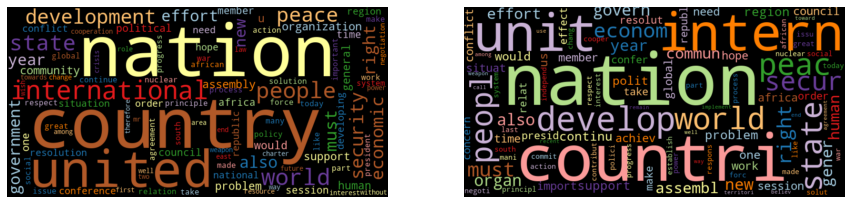

In [109]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
wordcloud(freqdic1['freq'], max_words=100)
plt.subplot(1,2,2)
wordcloud(freqdic2['freq'], max_words=100)

## lem vs stem for THAI

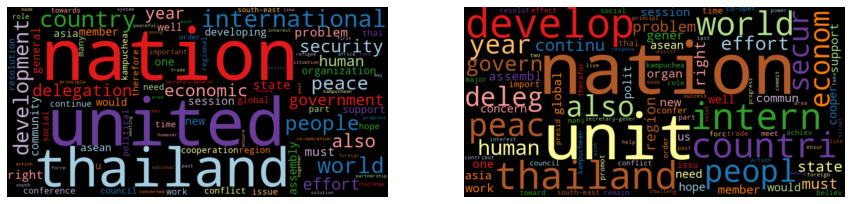

In [110]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
wordcloud(freqdic_tha['freq'], max_words=100)
plt.subplot(1,2,2)
wordcloud(freqdic_tha1['freq'], max_words=100)

## [THA] Find the most frequent "S" words  (using Stem)

In [136]:
sdic = freqdic_tha1.reset_index()[freqdic_tha1.reset_index()['token'].apply(lambda x: x[0] == 'd')]

In [137]:
sdic = sdic.set_index('token')
sdic

,freq
token,
develop,814
deleg,361
drug,83
differ,79
disarma,70
...,...
depress,3
defi,3
disorderli,3


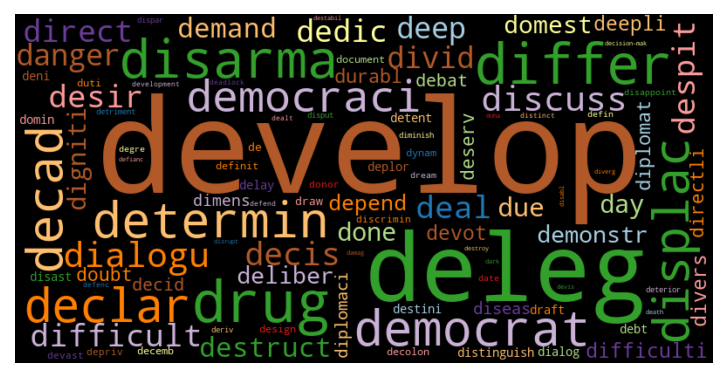

In [138]:
plt.figure(dpi=150)
wordcloud(sdic['freq'], max_words = 100)

In [153]:
undeb['wordpersen'] = undeb['stem'].apply(len)
undeb.iloc[:5, 10:]

,stem,wordpersen
0,"[may, first, convey, presid, congratul, albani...",4091
1,"[fortun, coincid, precis, time, unit, nation, ...",2339
2,"[pleasur, extend, mr, presid, warmest, congrat...",2569
3,"[may, begin, express, ambassador, hambro, beha...",2164
4,"[doubt, us, come, rostrum, wonder, use, futil,...",2064


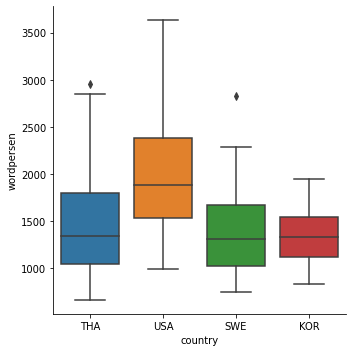

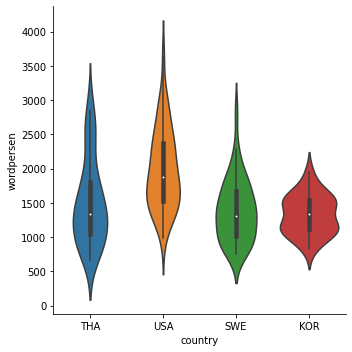

In [154]:
where = undeb['country'].isin(['USA', 'SWE', 'THA', 'KOR'])
sns.catplot(data=undeb[where], x='country', y= 'wordpersen', kind='box')
sns.catplot(data=undeb[where], x='country', y= 'wordpersen', kind='violin')